In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,RobustScaler
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('heart.csv')
df =data.copy()
df.shape

(918, 12)

In [7]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<AxesSubplot:ylabel='HeartDisease'>

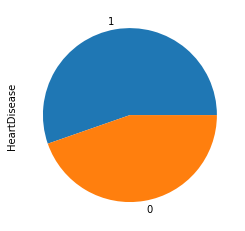

In [8]:
df['HeartDisease'].value_counts().plot.pie()

In [9]:
df['HeartDisease'].isna().sum()

0

<AxesSubplot:ylabel='None'>

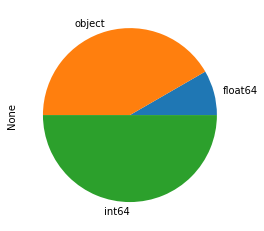

In [10]:
(df.dtypes.value_counts().sort_values()).plot.pie()

In [11]:
#split the features by data type :
float_columns =list (df.select_dtypes('float'))
qualitative_columns = list(df.select_dtypes('object'))
int_columns =list(df.select_dtypes('int64'))
qualitative_columns 
print(qualitative_columns )

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Sex -----> ['M' 'F'] :
 M    0.78976
F    0.21024
Name: Sex, dtype: float64 

ChestPainType -----> ['ATA' 'NAP' 'ASY' 'TA'] :
 ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64 

RestingECG -----> ['Normal' 'ST' 'LVH'] :
 Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64 

ExerciseAngina -----> ['N' 'Y'] :
 N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64 

ST_Slope -----> ['Up' 'Flat' 'Down'] :
 Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64 



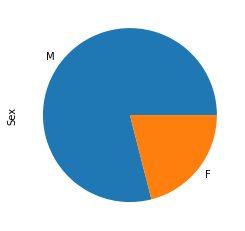

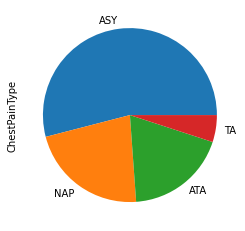

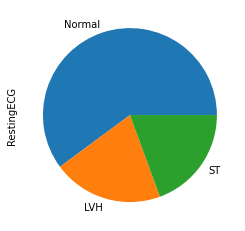

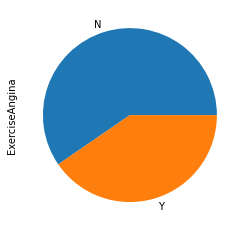

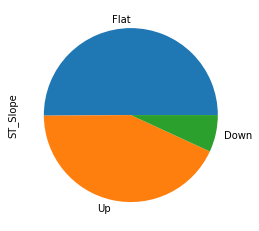

In [12]:
for col in qualitative_columns :
    plt.figure()
    print(col ,'----->' , df[col].unique() ,':\n' , df[col].value_counts()/df.shape[0] , '\n')
    df[col].value_counts().plot.pie()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


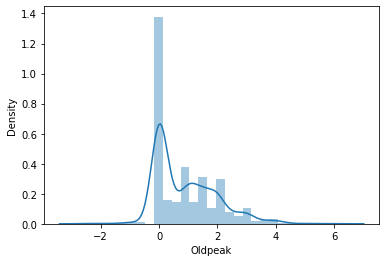

In [13]:
for col in float_columns :
    plt.figure()
    sns.distplot(df[col])

In [14]:
df['Oldpeak'].value_counts().sort_values()

-2.6      1
-0.8      1
 5.6      1
 3.8      1
 3.1      1
-0.7      1
-1.1      1
-0.9      1
-1.5      1
 5.0      1
 6.2      1
 2.9      1
 4.4      1
 3.7      1
-2.0      1
 3.2      2
-0.1      2
 2.1      2
 3.5      2
-0.5      2
-1.0      2
 2.3      2
 4.2      2
 3.4      3
 0.9      4
 2.4      4
 3.6      4
 2.2      5
 1.7      6
 1.3      7
 2.6      7
 1.9      7
 2.8      7
 0.7      7
 1.1      7
 4.0      8
 0.3     11
 0.4     11
 0.6     14
 0.1     14
 2.5     16
 1.6     16
 0.8     16
 1.8     17
 1.4     18
 0.5     19
 0.2     22
 1.2     26
 3.0     28
 1.5     53
 2.0     76
 1.0     86
 0.0    368
Name: Oldpeak, dtype: int64

In [15]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [16]:
df['FastingBS'].value_counts()/df.shape[0]

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

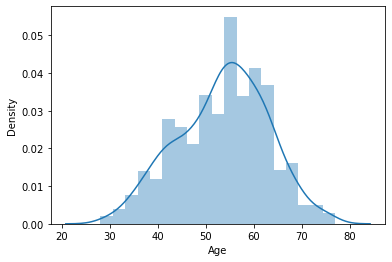

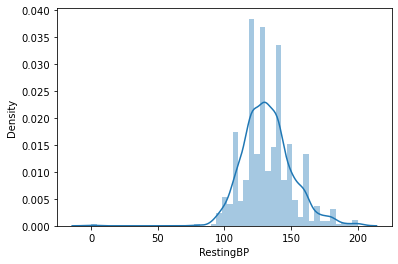

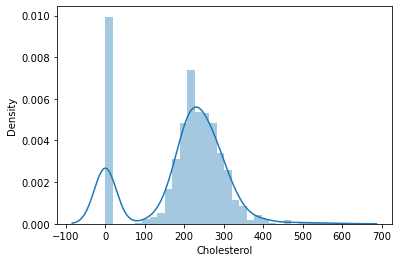

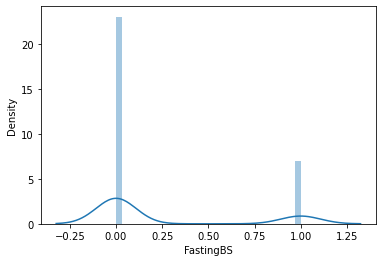

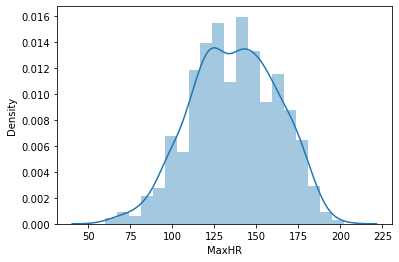

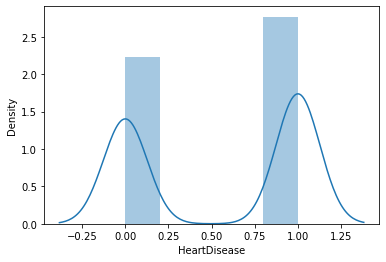

In [17]:
for col in int_columns :
    plt.figure()
    sns.distplot(df[col])

In [18]:
#VISUALISATION FEATURE TARGET


In [19]:
pos_heart_D = df[df['HeartDisease'] == 1]
neg_heart_D = df[df['HeartDisease'] == 0]
quant_columns = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR' , 'Oldpeak']]
qual_columns = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ,'FastingBS']]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

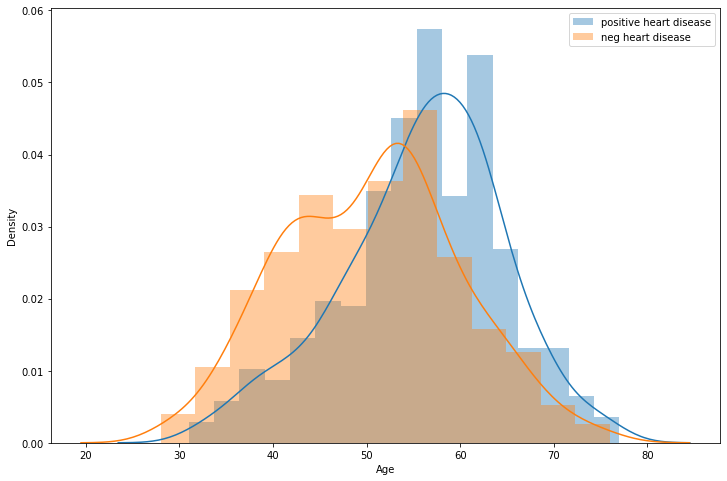

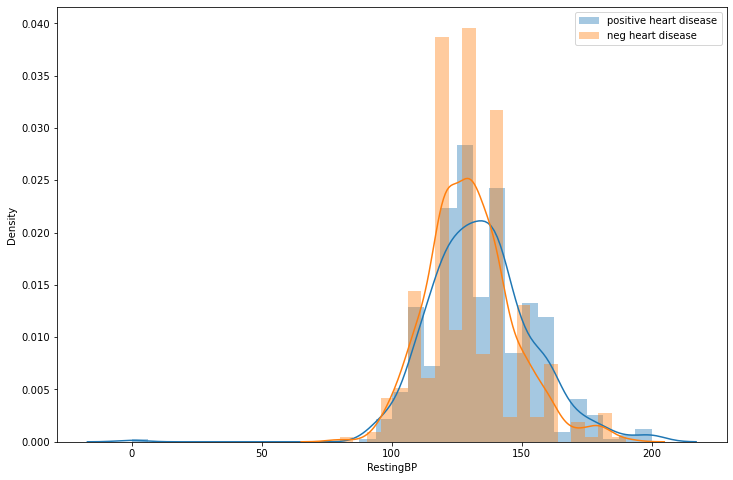

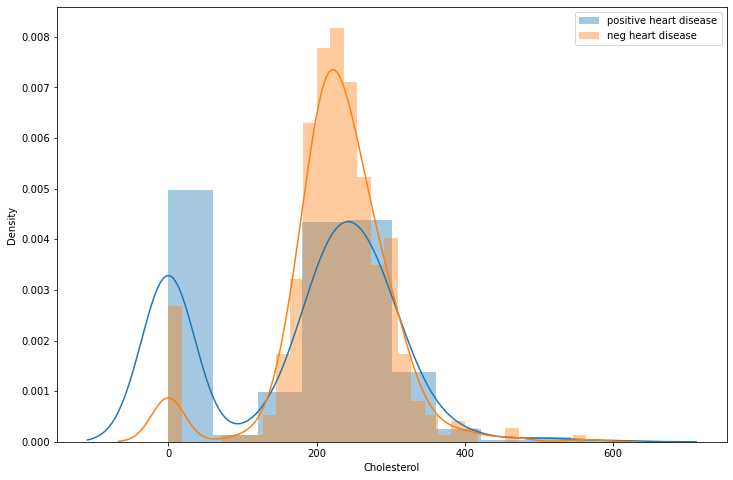

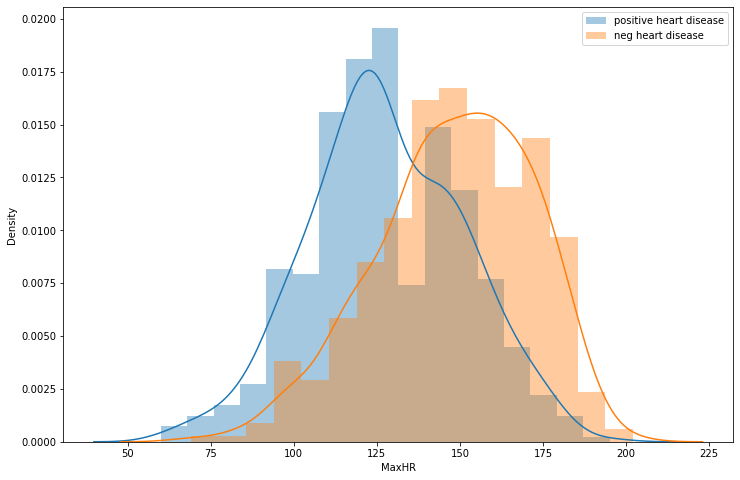

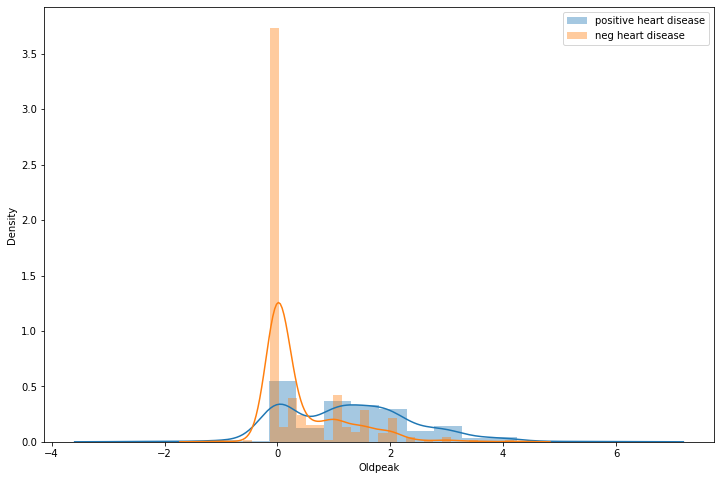

In [20]:
for col in quant_columns :
    plt.figure(figsize=(12,8))
    sns.distplot(pos_heart_D[col] , label = 'positive heart disease')
    sns.distplot(neg_heart_D[col] , label = 'neg heart disease')
    plt.legend()

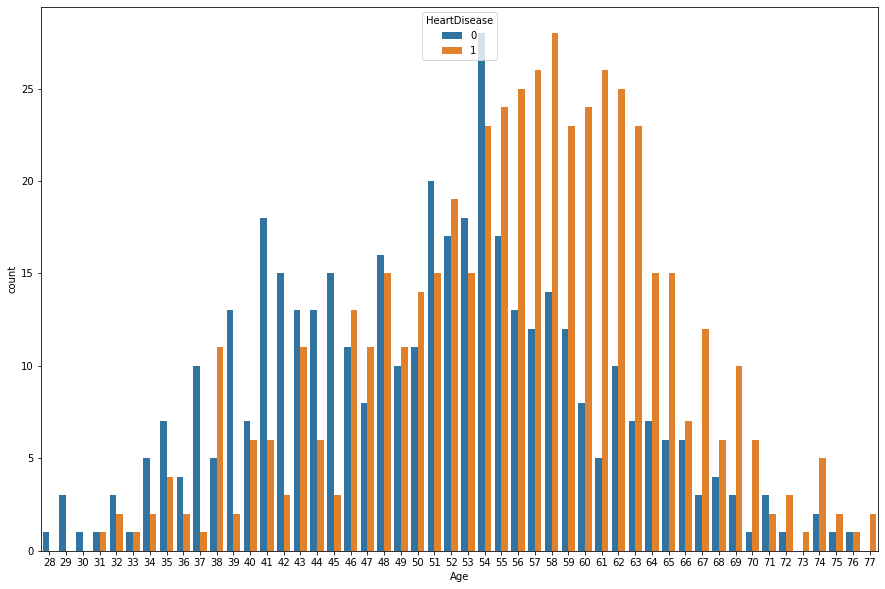

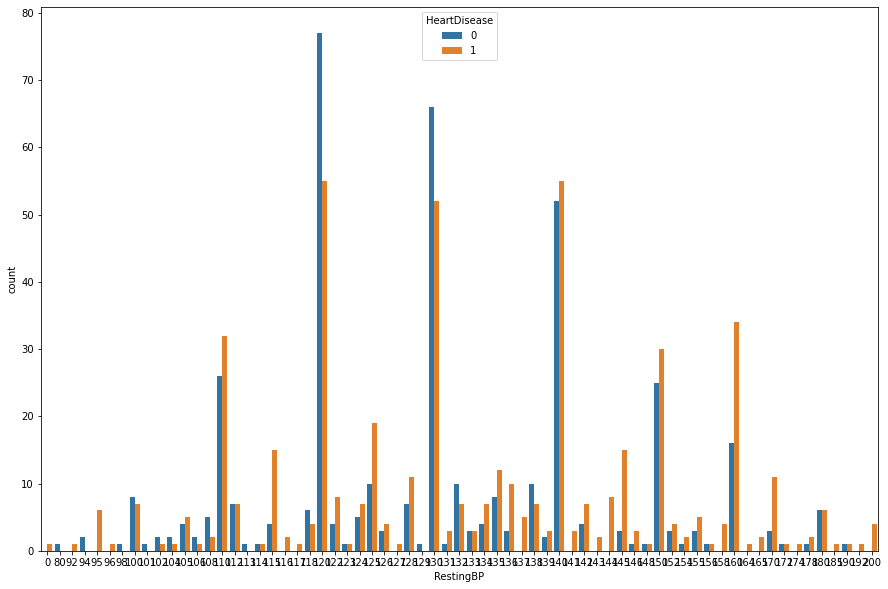

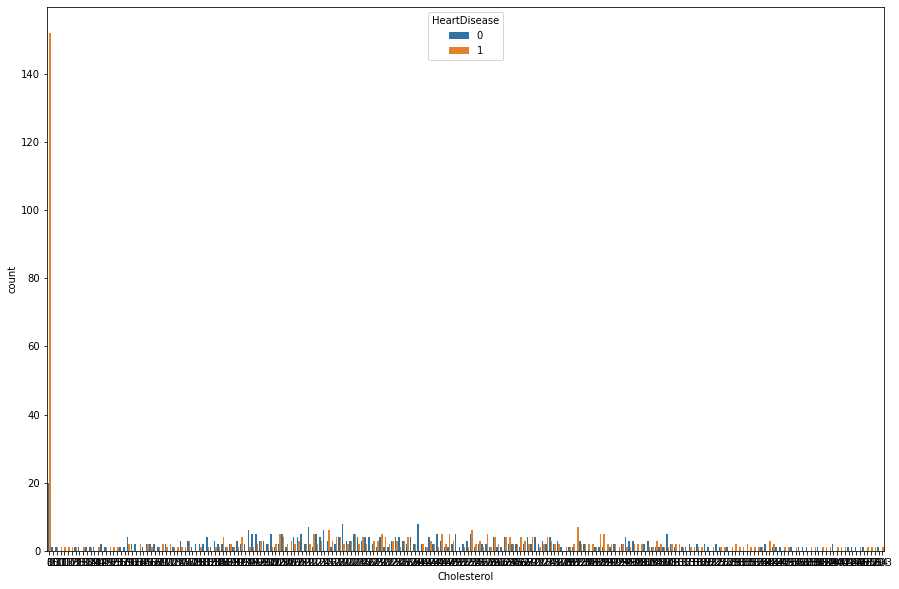

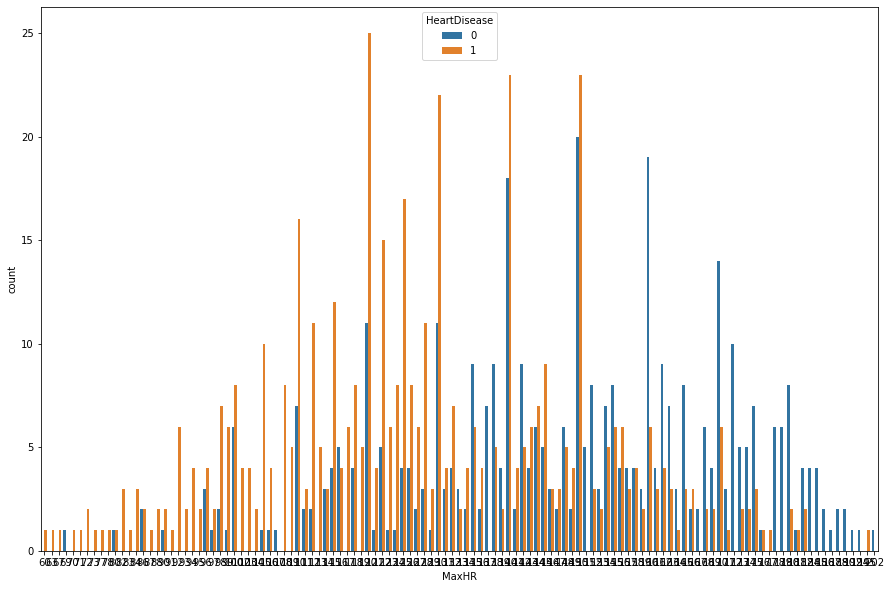

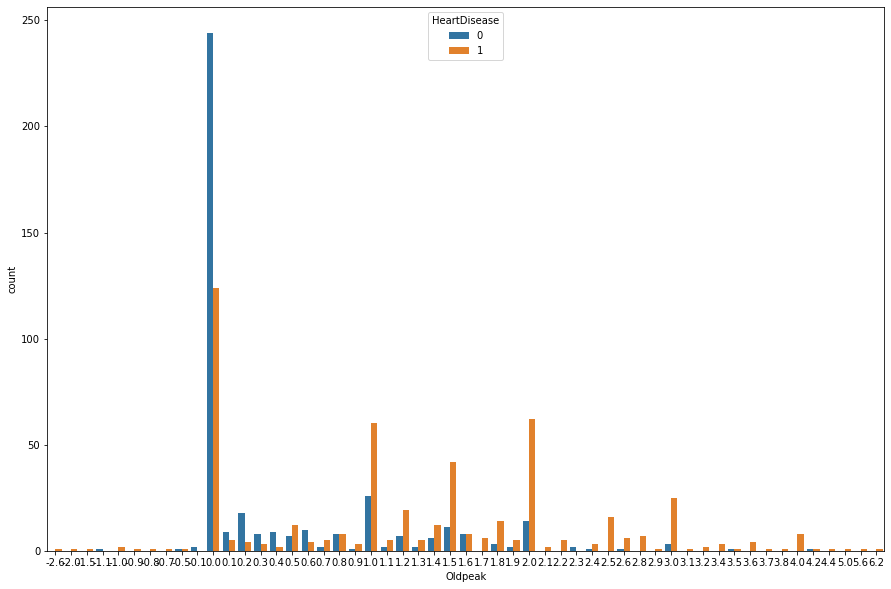

In [21]:
for col in quant_columns :
    plt.figure(figsize=(15,10))
    sns.countplot(x=col , hue = 'HeartDisease' , data = df)

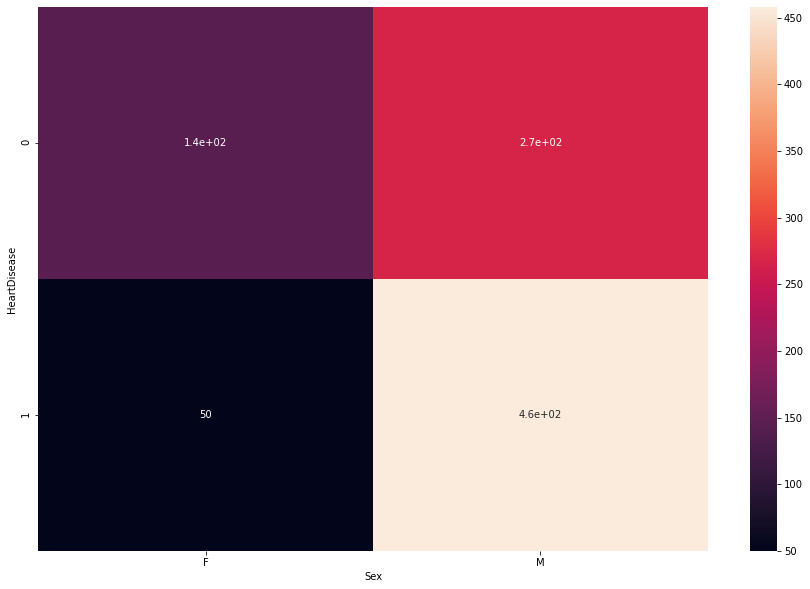

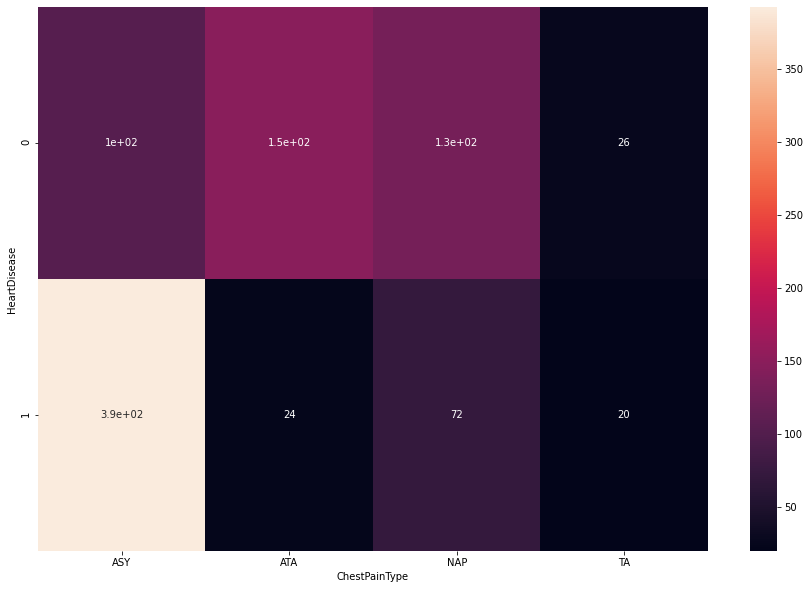

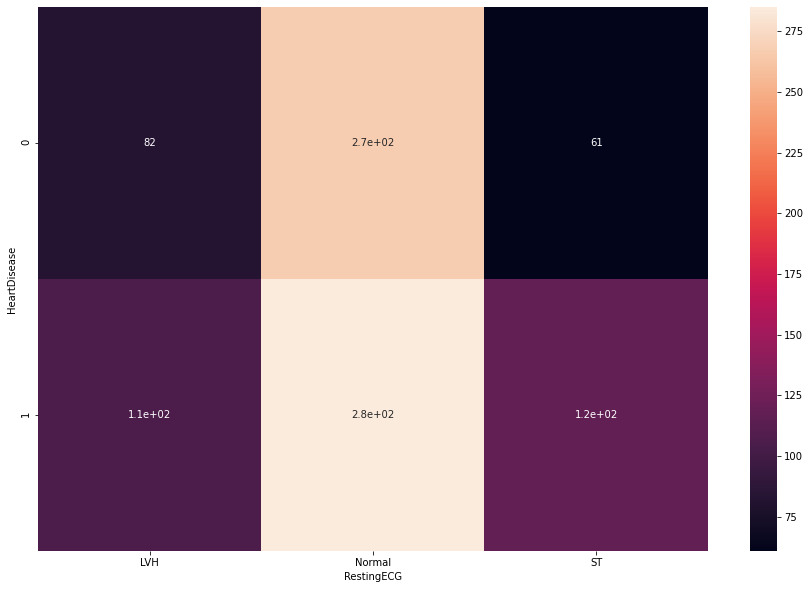

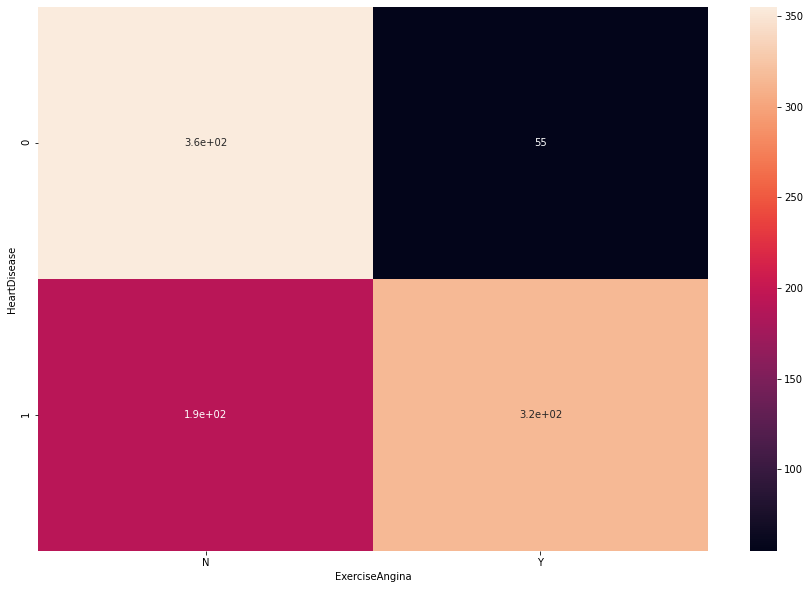

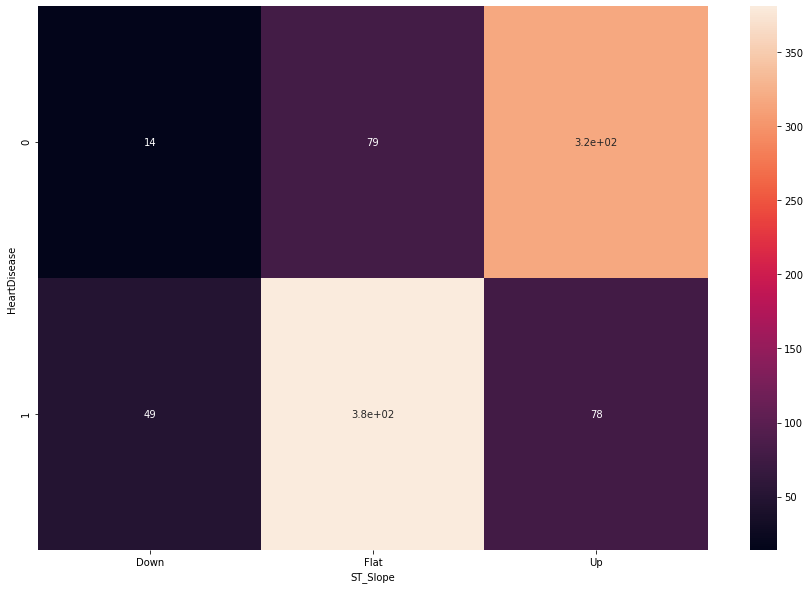

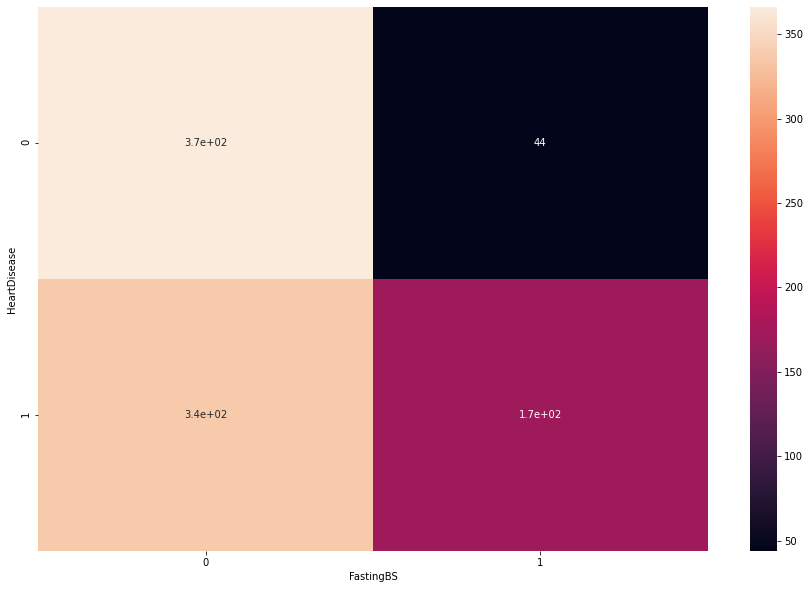

In [22]:
for col in qual_columns :
    plt.figure(figsize=(15,10))
    sns.heatmap(pd.crosstab(df['HeartDisease'] , df[col]) , annot = True )

In [23]:
pd.crosstab(df['HeartDisease'] , df['Sex'])

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


<AxesSubplot:>

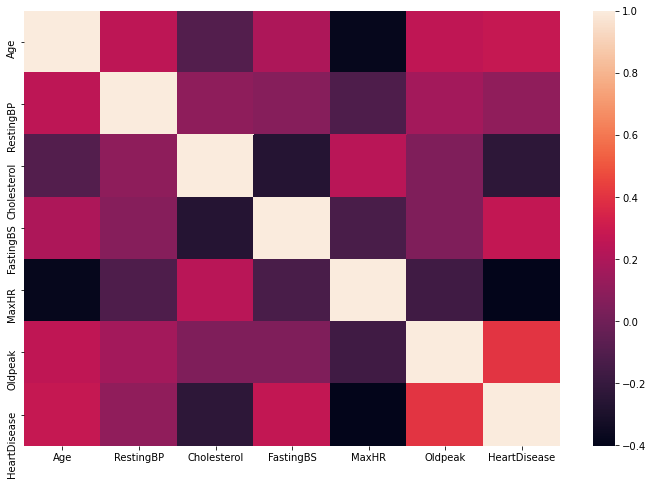

In [24]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr())

In [25]:
#ENCODAGE
from sklearn.model_selection import train_test_split
df = data.copy()

In [26]:
for col in qualitative_columns :
    plt.figure()
    print( df[col].unique() ,':\n' , df[col].value_counts()/df.shape[0] , '\n')
    

['M' 'F'] :
 M    0.78976
F    0.21024
Name: Sex, dtype: float64 

['ATA' 'NAP' 'ASY' 'TA'] :
 ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64 

['Normal' 'ST' 'LVH'] :
 Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64 

['N' 'Y'] :
 N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64 

['Up' 'Flat' 'Down'] :
 Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64 



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
def ENCODAGE(df):
    code = {'M':0,
            'F':1,
           'ATA':0 , 'NAP':1 , 'ASY':2 , 'TA': 3,
            'Normal': 0 ,'ST':1 , 'LVH':2 ,
            'N':0 , 'Y':1 ,
            'Up':0 , 'Flat':1 , 'Down':2 ,
           }
    
    for col in qualitative_columns:
        df.loc[:,col] = df[col].map(code)
        
def PREPROCESSING(df):
    #encoder = OneHotEncoder()
    #df_enc = encoder.fit_transform(df)
    #ENCODAGE(df)
    X = df.drop(['HeartDisease'] , axis =1)
    Y = df['HeartDisease']
    return X ,Y

In [33]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#df_enc = encoder.fit_transform(trainset)
#print(df_enc)

In [34]:
trainset , testset = train_test_split(df , test_size = 0.2 , random_state = 0)
print(trainset.shape)
print(testset.shape)
print(trainset['HeartDisease'].value_counts() , '\n' ,testset['HeartDisease'].value_counts() )

(734, 12)
(184, 12)
1    401
0    333
Name: HeartDisease, dtype: int64 
 1    107
0     77
Name: HeartDisease, dtype: int64


In [36]:
X_train , Y_train = PREPROCESSING(trainset)
X_test , Y_test = PREPROCESSING(testset)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#X_train.head(20)

(734, 11)
(734,)
(184, 11)
(184,)


In [73]:
def EVALUATION(model) :
    model.fit(X_train , Y_train )
    Y_pred = model.predict(X_test)
    print('accuracy_score : ' ,accuracy_score(Y_test , Y_pred) ,'\n' )
    print(confusion_matrix(Y_test , Y_pred ))
    print(classification_report(Y_test , Y_pred ))
    N ,train_score , val_score =learning_curve(model, X_train , Y_train , cv =4 , scoring = 'f1' , train_sizes = np.linspace(0.1 , 1 , 10))
    plt.figure(figsize=(12,8))
    plt.plot(N , train_score.mean(axis =1) , label = 'train score')
    plt.plot(N , val_score.mean(axis =1) , label = 'validation score')
    plt.legend()
    print(train_score.mean(axis =1).min())
    print(val_score.mean(axis =1).max())

In [60]:
#np.any(np.isnan(mat))
#np.all(np.isfinite(mat))

In [58]:
#Modelisation 


In [62]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix , classification_report , f1_score ,accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import VarianceThreshold , SelectFromModel , SelectKBest ,chi2 ,f_classif
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

#RF =make_pipeline(SelectKBest(f_classif ) , RandomForestClassifier(random_state =0)) #PolynomialFeatures(3) ,
#KNN = make_pipeline(SelectKBest(f_classif) , KNeighborsClassifier())
categorical_pipeline =make_pipeline(OrdinalEncoder())
numerical_pipeline = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((numerical_pipeline , ['Age' ,'RestingBP' ,'Cholesterol' ,'MaxHR' ,'Oldpeak']) ,(categorical_pipeline , qualitative_columns) )


SVM = make_pipeline(preprocessor ,SelectKBest(f_classif) , SVC(random_state =0))

accuracy_score :  0.8532608695652174 

[[60 17]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

0.9570051890289102
0.8809831691297207


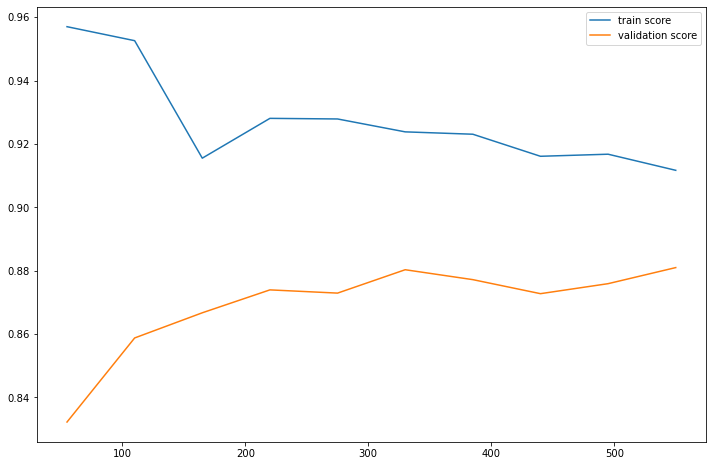

In [72]:
EVALUATION(SVM)

In [66]:
#SVM.get_params()

In [69]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
'''params_grid = {
              'selectkbest__k' : range(8 ,11) ,
              'svc__C' :[0.1 , 0.5 ,1 ,10,100] ,
              'svc__gamma' :[1e-1 ,1e-2 ,1e-3 , 1e-4 ,1e-5]}'''

params_grid = {'selectkbest__k' : range(8 ,12) ,
               'svc__C': [0.1 ,0.5 ,1, 10],
              'svc__gamma': [ 'scale' , 0.1 , 0.2 , 0.5 , 1 ,10],
              'svc__kernel': ['rbf']}

grid = GridSearchCV(SVM , params_grid , cv=4 ,scoring = 'accuracy') #) # ,n_iter = 100
grid.fit(X_train , Y_train)
print(grid.best_params_)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

{'selectkbest__k': 8, 'svc__C': 1, 'svc__gamma': 0.2, 'svc__kernel': 'rbf'}


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pc\anaco

accuracy_score :  0.8315217391304348 

[[58 19]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        77
           1       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

0.9130569895103358
0.8953463852051222


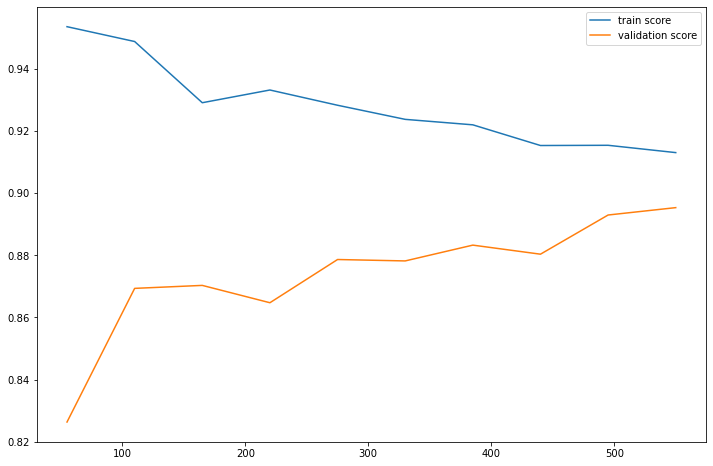

In [74]:
model2 = grid.best_estimator_
EVALUATION(model2)

In [ ]:
'''RF =make_pipeline(SelectKBest(f_classif ) , RandomForestClassifier(random_state =0))
EVALUATION(RF)'''

In [ ]:
'''params_grid = {'randomforestclassifier__n_estimators':[50, 100, 300],
             'randomforestclassifier__max_features':[2, 3, 4],
             'randomforestclassifier__max_depth':[3, 5, 7, 9],
             'randomforestclassifier__min_samples_split':[2, 5, 8]}
grid2 = GridSearchCV(RF , params_grid , cv=4 , scoring = 'accuracy')  # ,n_iter = 100
grid2.fit(X_train , Y_train)
print(grid2.best_params_)
model3 = grid2.best_estimator_
EVALUATION(model3)'''

In [ ]:
'''KNN = make_pipeline(SelectKBest(f_classif) , KNeighborsClassifier())
EVALUATION(KNN)'''

In [ ]:
'''k_values= range(1, 30)
params_grid = {"kneighborsclassifier__n_neighbors": k_values, "kneighborsclassifier__p": [1, 2], "kneighborsclassifier__weights": ['uniform', "distance"]}
grid2 = GridSearchCV(KNN , params_grid , cv=4 , scoring = 'accuracy')  # ,n_iter = 100
grid2.fit(X_train , Y_train)
print(grid2.best_params_)
model3 = grid2.best_estimator_
EVALUATION(model3)'''

In [91]:
from xgboost import XGBClassifier

In [102]:
#DX_train = xgb.DMatrix(X_train , Y_train  )  #, label=label) 
categorical_pipeline =make_pipeline(OneHotEncoder())
numerical_pipeline = make_pipeline(RobustScaler())
preprocessor = make_column_transformer((numerical_pipeline , ['Age' ,'RestingBP' ,'Cholesterol' ,'MaxHR' ,'Oldpeak']) ,(categorical_pipeline , qualitative_columns) )
XGB = make_pipeline(preprocessor ,XGBClassifier(random_state = 0))  #,SelectKBest(f_classif) 


[14:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score :  0.8532608695652174 

[[63 14]
 [13 94]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.87      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

[14:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behav

[14:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

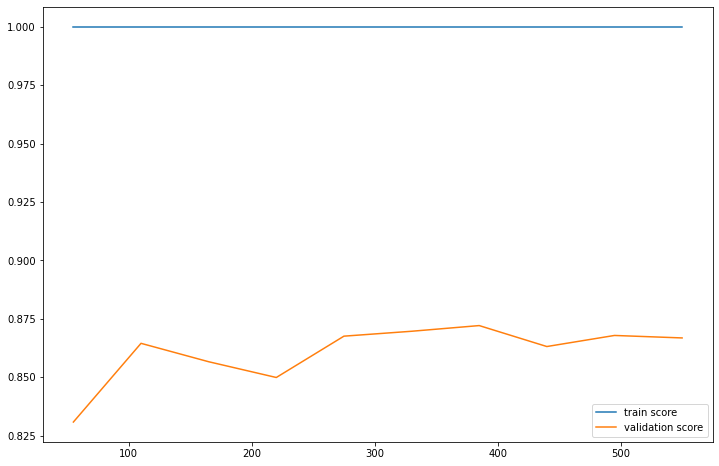

In [103]:
EVALUATION(XGB)

In [108]:
#XGB.get_params()

In [104]:
params_grid = {'xgbclassifier__learning_rate' : [ 0.02 , 0.03 , 0.04, 0.05 ,0.06] ,
               'xgbclassifier__max_depth': [10,11,12,13,14,15 ,16,17,18,19,20],
              'xgbclassifier__gamma': [4],
              'xgbclassifier__n_estimators': [110,112,113,114,115,118,120]}

grid = RandomizedSearchCV(XGB , params_grid , cv=4 , scoring = 'accuracy' ,n_iter = 50) # ,n_iter = 100
grid.fit(X_train , Y_train)
print(grid.best_params_)

[14:35:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score :  0.842391304347826 

[[59 18]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        77
           1       0.84      0.90      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

[14:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[14:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

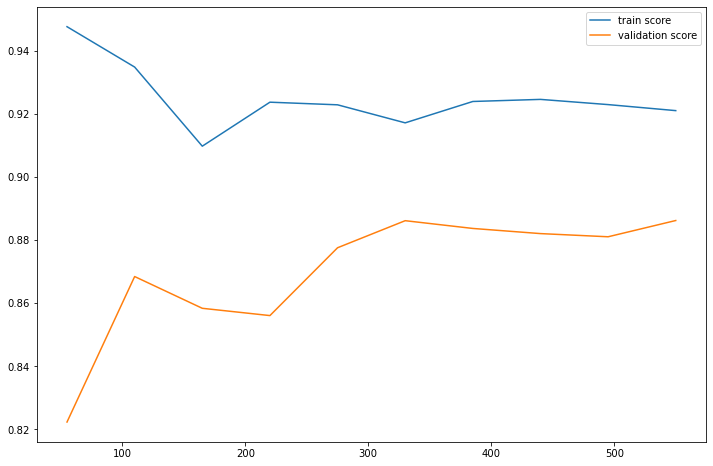

In [109]:

MODEL = grid.best_estimator_
XGBClass = xgb.XGBClassifier(n_estimators= 115, max_depth= 16, learning_rate= 0.05, gamma= 4 ,random_state = 0)
PIPELINE = make_pipeline(preprocessor , XGBClass )
EVALUATION(MODEL)
#{'n_estimators': 120, 'max_depth': 10, 'learning_rate': 0.02, 'gamma': 4}
#'n_estimators': 110, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 4}
#{'n_estimators': 115, 'max_depth': 16, 'learning_rate': 0.05, 'gamma': 4}
